<a href="https://colab.research.google.com/github/Mangai2024/Bank_Personal_loan_modelling/blob/main/Telco_Customer_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Useful for - Telecom companies to reduce customer loss.


Important Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the dataset
df=pd.read_csv("/content/telco.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [6]:
#list of columns to keep
columns_to_keep = [
    'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
    'Number of Dependents', 'Country', 'City', 'Tenure in Months', 'Phone Service',
    'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
    'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
    'Paperless Billing', 'Churn Label'
]

In [7]:
# Drop unwanted columns
df= df[columns_to_keep]

In [8]:
print(df.head())

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   
2    Male   71       No            Yes      No        Yes   
3  Female   78       No            Yes     Yes        Yes   
4  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country         City  Tenure in Months  ...  \
0                     0  United States  Los Angeles                 1  ...   
1                     1  United States  Los Angeles                 8  ...   
2                     3  United States  Los Angeles                18  ...   
3                     1  United States    Inglewood                25  ...   
4                     1  United States     Whittier                37  ...   

  Online Security Online Backup Device Protection Plan Premium Tech Support  \
0              No            No                    Yes                   No   
1     

In [9]:
# Check for missing values
df.isnull().sum()

,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
City,0
Tenure in Months,0


In [10]:
# See what Internet Service is for rows where Internet Type is missing
df[df['Internet Type'].isna()]['Internet Service'].value_counts()


,count
Internet Service,
No,1526


In [11]:
df['Internet Type'] =df['Internet Type'].fillna('No Internet')

<ipython-input-11-bb0fb267219e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Internet Type'] =df['Internet Type'].fillna('No Internet')


EDA Process-Check how many customers churned vs stayed.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<ipython-input-14-a7ae2afb4d36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn Label', y='Tenure in Months', palette='Set2')


Text(0.5, 1.0, 'Tenure vs Churn')

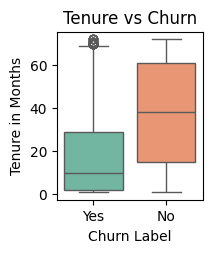

In [14]:
#1. Tenure vs Churn
plt.subplot(2,3,1)
sns.boxplot(data=df, x='Churn Label', y='Tenure in Months', palette='Set2')
plt.title('Tenure vs Churn')

<ipython-input-15-8c380e62fca4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn Label', y='Avg Monthly GB Download', palette='Pastel1')


Text(0.5, 1.0, 'Monthly GB Download vs Churn')

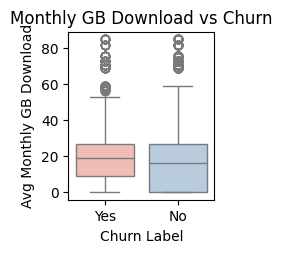

In [15]:
#2. Monthly GB Download vs Churn
plt.subplot(2,3,2)
sns.boxplot(data=df, x='Churn Label', y='Avg Monthly GB Download', palette='Pastel1')
plt.title('Monthly GB Download vs Churn')

In [16]:
print(df.columns)

Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Country', 'City', 'Tenure in Months',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Churn Label'],
      dtype='object')


([0, 1, 2, 3],
 [Text(0, 0, 'DSL'),
  Text(1, 0, 'Fiber Optic'),
  Text(2, 0, 'Cable'),
  Text(3, 0, 'No Internet')])

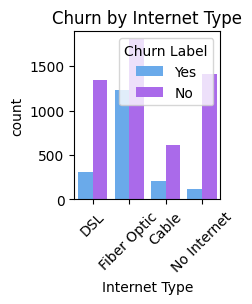

In [17]:
#3. Churn by Internet Type
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Internet Type', hue='Churn Label', palette='cool')
plt.title('Churn by Internet Type')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Churn by Premium Tech Support')

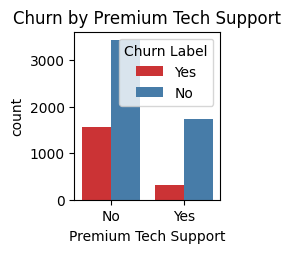

In [18]:
#4.Churn by Premium Tech support
plt.subplot (2,3,4)
sns.countplot(data=df, x='Premium Tech Support', hue='Churn Label', palette='Set1')
plt.title('Churn by Premium Tech Support')

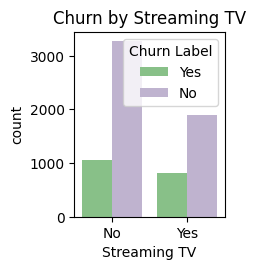

In [19]:
# 5. Churn by Streaming TV
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Streaming TV', hue='Churn Label', palette='Accent')
plt.title('Churn by Streaming TV')

plt.tight_layout()
plt.show()


 Data Preprocessing (for model building)

In [20]:
#Label encoding for categorical variables
from sklearn. preprocessing import LabelEncoder


In [21]:
le=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] =le.fit_transform(df[col])

 Feature & target split

In [22]:
x = df.drop('Churn Label',axis=1)
y = df['Churn Label']

In [23]:
df['Churn Label'].value_counts()

,count
Churn Label,
0,5174
1,1869


In [24]:
df=df[df['Churn Label'] !=2]

In [25]:
df['Churn Label'].value_counts()

,count
Churn Label,
0,5174
1,1869


Train-test split

In [26]:
from sklearn.model_selection  import train_test_split

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

Model Building- RandomForest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(x_test)

Model Evaluation

Accuracy: 0.7885024840312278
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1009
           1       0.67      0.50      0.57       400

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



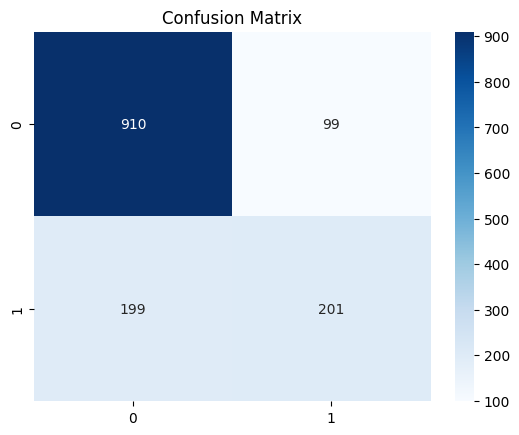

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,  fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [33]:
#Check Feature Importance

In [34]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

In [35]:
#get feature importances
importances = model.feature_importances_
features = x.columns


In [36]:
#Create a Dataframe
importance_df=pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)


<ipython-input-37-05a2d98d783a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


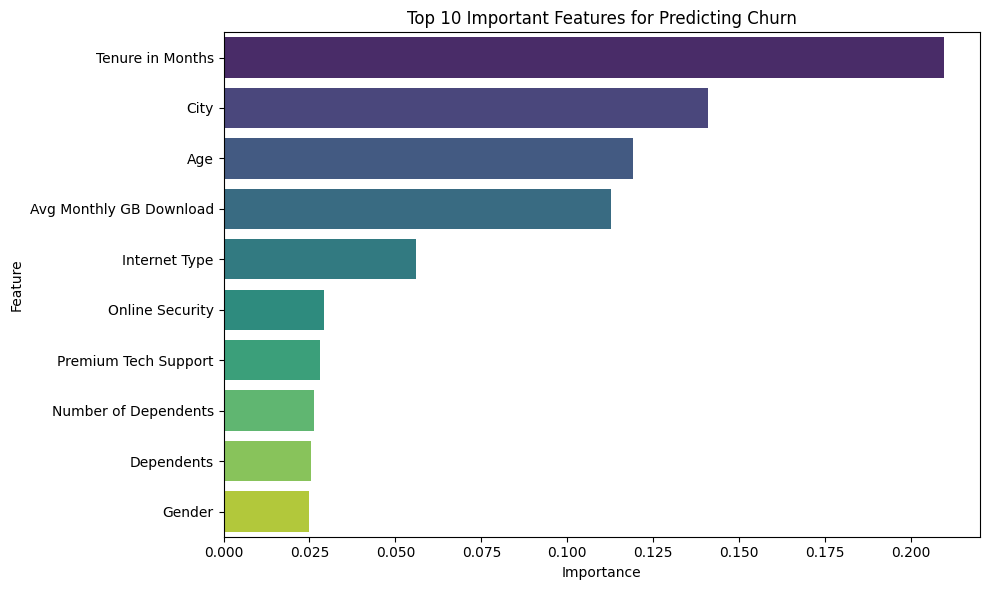

In [37]:
#Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features for Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Select Top Features

In [38]:
x=df.drop('Churn Label', axis=1)
y=df['Churn Label']

In [39]:
top_features = importance_df.head(10)['Feature'].tolist()
x_selected = x[top_features]


Re-train Random Forest with top features

In [40]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(x_test)

Accuracy: 0.7885024840312278
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1009
           1       0.67      0.50      0.57       400

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



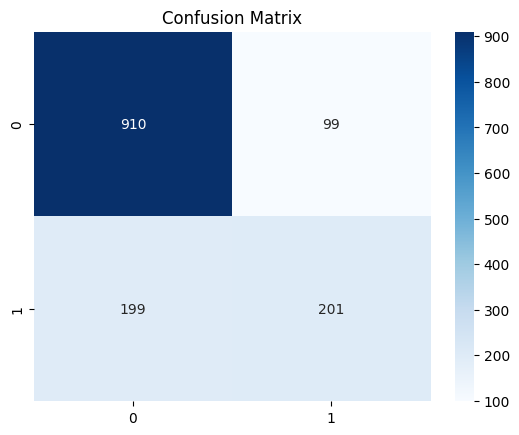

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,  fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:51:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🎯 Accuracy: 0.7927608232789212

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1009
           1       0.65      0.57      0.61       400

    accuracy                           0.79      1409
   macro avg       0.75      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



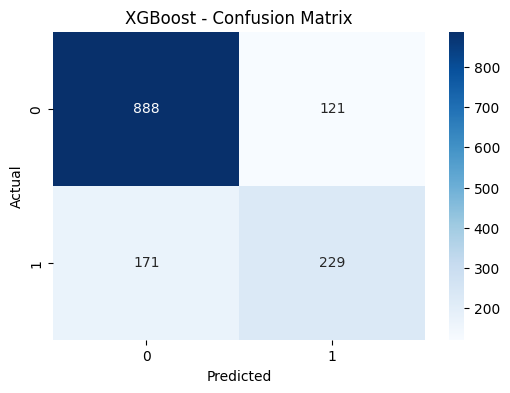

In [43]:
# Install xgboost if not already installed
!pip install xgboost

# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate
print("🎯 Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:52:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✨ Best Accuracy: 0.7998580553584103

📝 Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1009
           1       0.68      0.55      0.61       400

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.79      0.80      0.79      1409



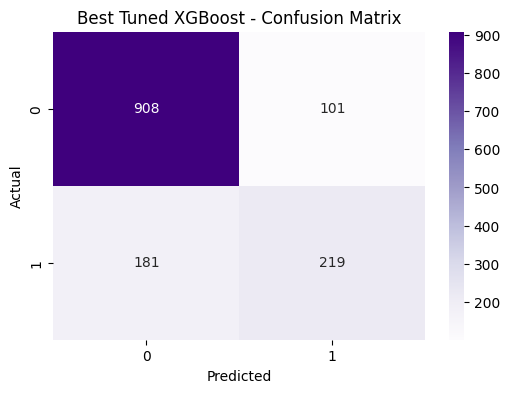

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Create base model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=25,  # number of combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(x_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predictions
y_pred_best = best_xgb.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("✨ Best Accuracy:", accuracy_score(y_test, y_pred_best))
print("\n📝 Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Purples')
plt.title("Best Tuned XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
